In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('Data/processed_data_tobacco.csv')


## Đổi tên cột 'Data_Value' thành 'Tobacco consumption percentage (%)'

In [84]:
df.rename(columns={'Data_Value': 'Tobacco consumption percentage (%)'}, inplace=True)

# tính tổng lượng tiêu thụ thuốc lá (%) cho mỗi nhóm 'TopicDesc' 


In [85]:
data_to_plot = df.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum()
data_to_plot


TopicDesc
Cessation (Youth)                101529.7
Cigarette Use (Youth)             73865.3
Smokeless Tobacco Use (Youth)     29600.0
Name: Tobacco consumption percentage (%), dtype: float64

## Chỉ lấy các dữ liệu có sử dụng thuốc lá trong dữ liệu khảo sát

In [86]:
if 'Cessation (Youth)' in data_to_plot:
    data_to_plot = data_to_plot.drop('Cessation (Youth)')

# Vẽ biểu đồ thể hiện tỉ lệ sử dụng "Thuốc lá có khói" và "Thuốc lá không khói" trong toàn bộ dữ liệu khảo sát

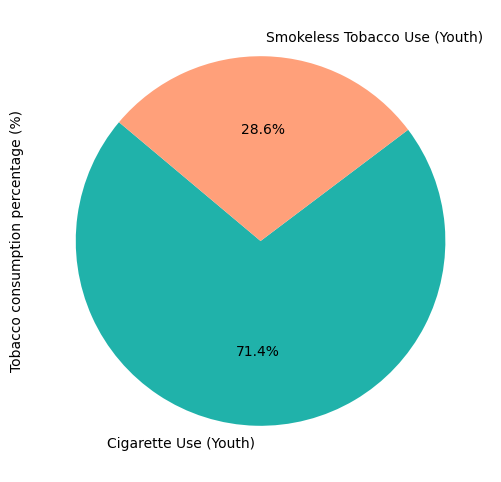

In [87]:
# Tạo biểu đồ pie
plt.figure(figsize=(6, 6))
data_to_plot.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightseagreen', 'lightsalmon'])
plt.show()


- Đánh giá
    - Trend tiêu dùng thuốc lá: Sự phân bố không đồng đều giữa các phương thức sử dụng thuốc lá. Sự dụng thuốc lá có khói chiếm tỷ lệ cao 71.4%, sử dụng thuốc lá không khói thấp chỉ 28.6%

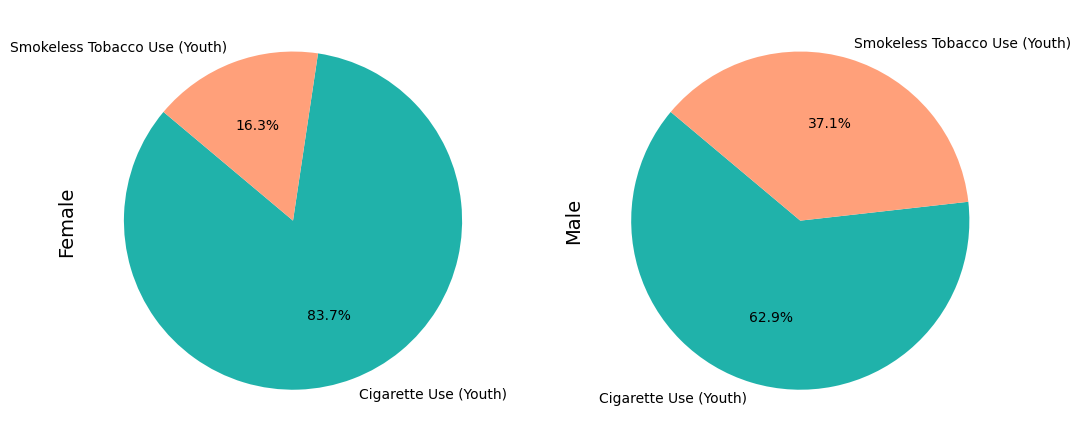

In [88]:
female_data = df[(df['Gender'] == 'Female') & (df['TopicDesc'] != 'Cessation (Youth)')]
male_data = df[(df['Gender'] == 'Male') & (df['TopicDesc'] != 'Cessation (Youth)')]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

female_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[0], colors=['lightseagreen', 'lightsalmon'])
axes[0].set_ylabel('Female', fontsize=14)

male_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[1], colors=['lightseagreen', 'lightsalmon'])
axes[1].set_ylabel('Male', fontsize=14)

plt.show()


- Đánh giá:
    - Tỉ lệ sử dụng thuốc lá vẫn chiếm ưu thế trên cả 2 giới tính riêng được khảo sát.
    - Tỉ lệ nữ sử dụng thuốc lá không khói ít hơn ti nam sử dụng thuốc lá không khói (16.3 và 37.1)

###  Lấy dữ liệu của các cuộc khảo sát của năm mới nhất.

In [97]:
latest_year=df['YEAR'].max()  
Latest_df = df.loc[df['YEAR'] == latest_year].copy()


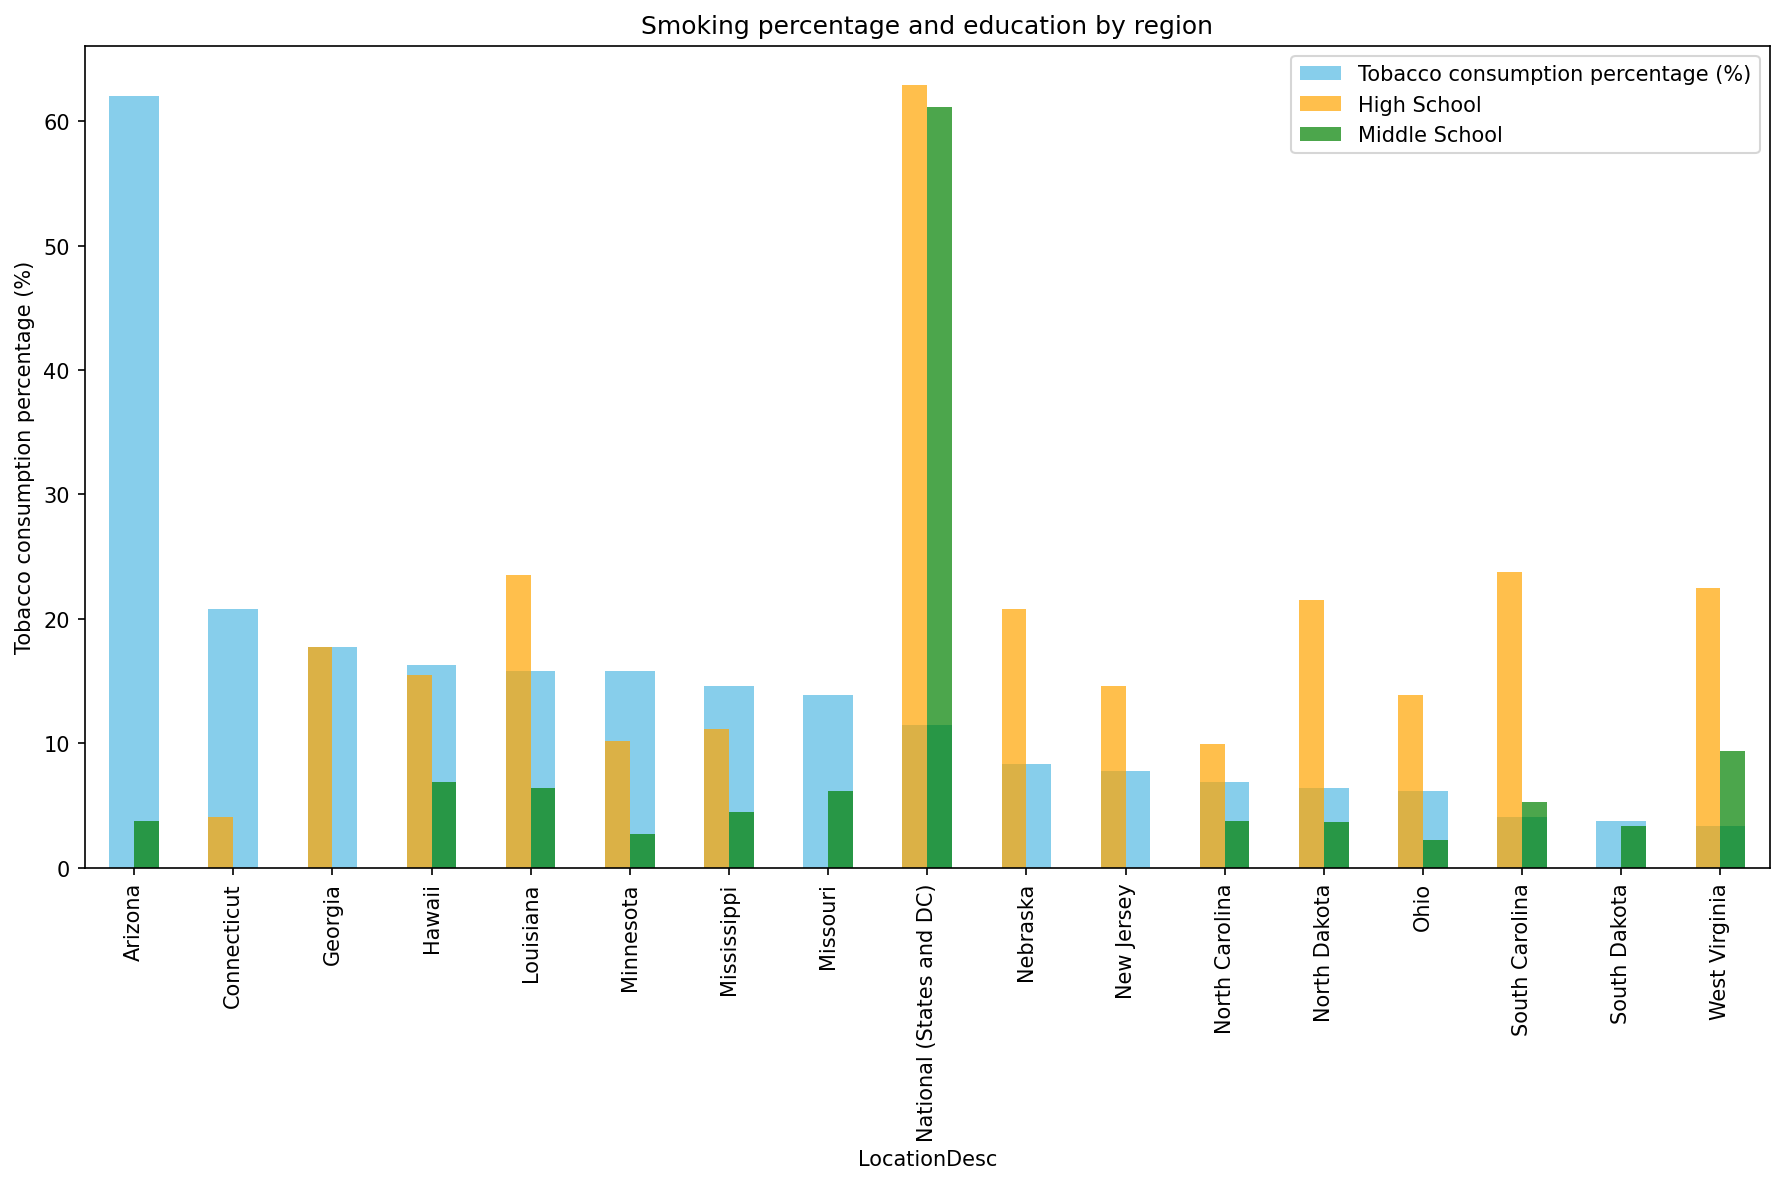

In [102]:
region_smoking = Latest_df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=False)
education_smoking = Latest_df.groupby(['LocationDesc', 'Education'])['Tobacco consumption percentage (%)'].mean().unstack()

plt.figure(figsize=(12, 8), dpi=150)
region_smoking.plot(kind='bar', color='skyblue', label='Tobacco consumption percentage (%)')

education_smoking.plot(kind='bar', ax=plt.gca(), color=['orange', 'green'], alpha=0.7)

plt.title('Smoking percentage and education by region')
plt.xlabel('LocationDesc')
plt.ylabel('Tobacco consumption percentage (%)')
plt.xticks(rotation=90)  
plt.legend(['Tobacco consumption percentage (%)', 'High School', 'Middle School'])
plt.tight_layout()
plt.show()

In [99]:
region_smoking

LocationDesc
National (States and DC)    62.050000
Nebraska                    20.816667
Georgia                     17.757143
West Virginia               16.262500
South Carolina              15.840476
Louisiana                   15.837500
New Jersey                  14.560870
North Dakota                13.869048
Hawaii                      11.444118
Ohio                         8.363158
Mississippi                  7.772222
North Carolina               6.858333
Minnesota                    6.405556
Missouri                     6.147368
Connecticut                  4.077778
Arizona                      3.750000
South Dakota                 3.372222
Name: Tobacco consumption percentage (%), dtype: float64

In [100]:
education_smoking

Education,High School,Middle School
LocationDesc,,
Arizona,NaN,3.750000
Connecticut,4.077778,NaN
Georgia,17.757143,NaN
Hawaii,15.511111,6.868750
Louisiana,23.559091,6.400000
Minnesota,10.138889,2.672222
Mississippi,11.105556,4.438889
Missouri,NaN,6.147368
National (States and DC),62.950000,61.150000
